C:\Users\aakas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.3877 - loss: 1.6753 - val_accuracy: 0.5871 - val_loss: 1.1627
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6072 - loss: 1.1233 - val_accuracy: 0.6205 - val_loss: 1.0803
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6571 - loss: 0.9780 - val_accuracy: 0.6739 - val_loss: 0.9446
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6933 - loss: 0.8821 - val_accuracy: 0.6741 - val_loss: 0.9469
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7190 - loss: 0.8079 - val_accuracy: 0.6836 - val_loss: 0.9227
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7409 - loss: 0.7437 - val_accuracy: 0.6875 - val_loss: 0.9040
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7579 - loss: 0.6972 - val_accuracy: 0.7010 - val_loss: 0.8866
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7694 -

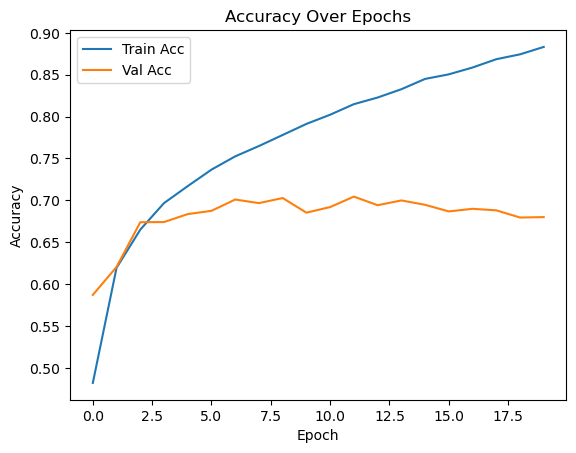

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


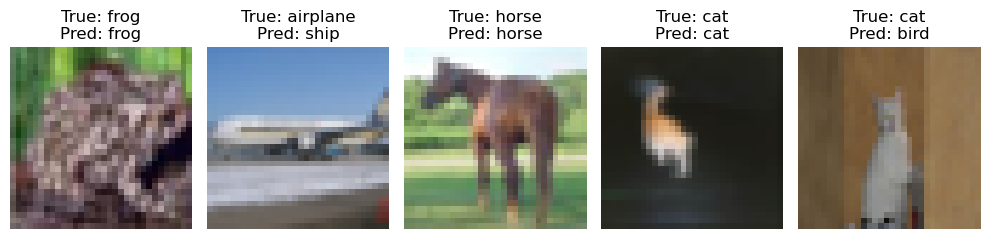

In [1]:
"USING CIFAR-10 DATASET uses 32x32 pixel image"

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

"Load CIFAR-10 dataset"
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

"Build CNN model"
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

"Compile & Train"
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

"Plot training history"
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

"Show predictions"
plt.figure(figsize=(10, 5))
for i in range(5):
    idx = np.random.randint(0, len(x_test))
    img, label = x_test[idx], y_test[idx][0]
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'True: {class_names[label]}\nPred: {class_names[pred_label]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 64s 305ms/step - accuracy: 0.6376 - loss: 0.6090 - val_accuracy: 0.8556 - val_loss: 0.3431
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 56s 288ms/step - accuracy: 0.8956 - loss: 0.2629 - val_accuracy: 0.8692 - val_loss: 0.3079
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 56s 287ms/step - accuracy: 0.9220 - loss: 0.2061 - val_accuracy: 0.8670 - val_loss: 0.3450
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9433 - loss: 0.1540 - val_accuracy: 0.8610 - val_loss: 0.3559
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 57s 289ms/step - accuracy: 0.9572 - loss: 0.1270 - val_accuracy: 0.8594 - val_loss: 0.3471


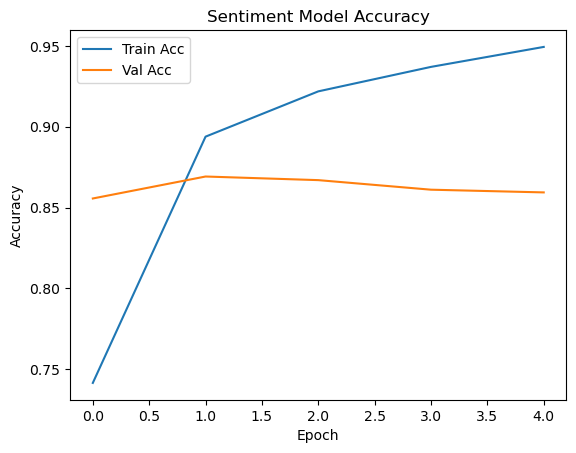

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

"Load IMDB reviews dataset"
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=200)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200)

"Build RNN model"
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

"Compile & train"
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

"Plot accuracy"
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Sentiment Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
"IMPORT IMAGE FROM DRIVE"

import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

"Load CIFAR-10 data & class names"
(_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

"Normalize data"
x_test = x_test / 255.0

"Build the same CNN model"
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

"Compile and train briefly"
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

"You can load full dataset to train better"
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

"Predict on user input image"
def classify_user_image(image_path):
    img = Image.open(image_path).resize((32, 32))
    img_array = np.array(img) / 255.0

    if img_array.shape != (32, 32, 3):
        print("Invalid image format! Must be RGB 32x32.")
        return

    prediction = model.predict(np.expand_dims(img_array, axis=0))
    predicted_class = class_names[np.argmax(prediction)]

    "Show image with prediction"
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

image_path = "Elite Tech - Task/TASK2/oggy.jpeg"  
classify_user_image(image_path)
